In [20]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [21]:
dir_source = "test_sample/" # path to the source image
dir_saved = "test_sample/saved/" # path to the folder to save the segmentaion
file_name = "ni_hao.jpeg"

In [22]:
image = cv2.imread('test_sample/ni_hao.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)

(594, 792)


In [23]:
def scan_image_horizontal(image):
    # Scan the image column by column to count how many dot in one column
    # Save all the amount in an array "horizontal"
    height = image.shape[0]
    width = image.shape[1]
    horizontal = np.zeros(width, dtype = int)
    for x in range(width): # From left to right
        count = 0 # The amount of dots of each column
        for y in range(height): # From top to bottom
            if (image[y][x] < 128) :
                count = count + 1
        horizontal[x] = count
#     print(horizontal)
    return horizontal

def scan_image_vertical(image):
    # Scan the image row by row to count how many dot in one row
    # Save all the amount in an array "vertical"
    height = image.shape[0]
    width = image.shape[1]
    vertical = np.zeros(height, dtype = int)
    for y in range(height): # From top to bottom
        count = 0 # The amount of dots of each row
        for x in range(width): # From left to right
            if (image[y][x] < 128) :
                count = count + 1
        vertical[y] = count
    # print(vertical)
    return vertical

In [24]:
def get_sentence_height(vertical):
    start_point = None
    end_point = None
    for i, y in enumerate(vertical):
        if y > 1 and start_point is None:
            start_point = i
        elif y > 1 and start_point is not None:
            pass
        elif y <= 1 and start_point is not None and end_point is None:
            end_point = i
        else:
            pass
    return end_point - start_point

In [25]:
def plot_peaks(array, direction):
    # Draw the plot of the scanning result
    x_axle = np.linspace(0, len(array), len(array))
    plt.plot(x_axle, array)
    plt.title('Dots Count')
    plt.xlabel(direction)
    plt.ylabel('number of dots')

    plt.show()

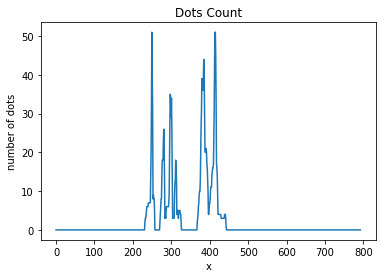

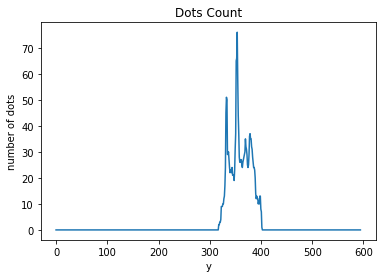

The height of these characters is about: 84 pixel


In [26]:
horizontal = scan_image_horizontal(image)
plot_peaks(horizontal, 'x')
vertical = scan_image_vertical(image)
plot_peaks(vertical, 'y')
char_height = get_sentence_height(vertical)
print('The height of these characters is about: ' + str(char_height) + ' pixel')

In [27]:
def segmentation(columns_sum, threshold, min_size):
    # Cut the sentence into characters
    # Because chinese characters are basically rectangle,
    # So we can cut it according to the height of a sentence.
    start_i = None
    end_i = None
    parts = []
    for i, val in enumerate(columns_sum):
        if val > threshold and start_i is None:
            start_i = i
        elif val > threshold and start_i is not None:
            pass
        elif val < threshold and start_i is not None:
            if i - start_i >= min_size:
                end_i = i
                # print(end_i - start_i)
                parts.append((start_i, end_i))
                start_i = None
                end_i = None
        elif val < threshold and start_i is None:
            pass
    return parts

horizontal_seg = segmentation(horizontal, 2, char_height * 0.75)
print(horizontal_seg)

vertical_seg = segmentation(vertical, 2, char_height * 0.75)
print(vertical_seg)

94
74
[(232, 326), (368, 442)]
82
[(319, 401)]


In [29]:
def cutImage(img, horizontal_ranges, vertical_ranges, output_size, dir_saved):
    count = 0
    for y, vertical_index_pair in enumerate(vertical_ranges):
        for x, horizontal_index_pair in enumerate(horizontal_ranges):
            count += 1
            cutted_char = img[vertical_index_pair[0]    : vertical_index_pair[1], 
                              horizontal_index_pair[0] : horizontal_index_pair[1]]
            resized_cutted_char = cv2.resize(cutted_char, output_size)
            cv2.imwrite(dir_saved + "row" + str(y) + "pos" + str(x) + ".jpg", resized_cutted_char)
            print("row" + str(y) + "pos" + str(x) + "saved!")
        
output_size = (150, 150)            
cutImage(image, horizontal_seg, vertical_seg, output_size, dir_saved)

row0pos0saved!
row0pos1saved!
